In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

!pip install --upgrade kaggle > /dev/null 2>&1
!mkdir -p ~/.kaggle/ && cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
!pip uninstall -y tensorflow 
!pip install tensorflow==2.4.3 > /dev/null 2>&1

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Tensorflow version 2.4.3
Running on TPU  ['10.21.188.34:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.21.188.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.21.188.34:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
!mkdir -p input/
!kaggle competitions download -c ventilator-pressure-prediction -p input/ --force

!unzip -o input/sample_submission.csv.zip -d input/
!unzip -o input/train.csv.zip -d input/
!unzip -o input/test.csv.zip -d input/

  0% 0.00/8.50M [00:00<?, ?B/s]
100% 8.50M/8.50M [00:00<00:00, 141MB/s]
 96% 134M/139M [00:00<00:00, 122MB/s]
100% 139M/139M [00:00<00:00, 159MB/s]
 74% 56.0M/75.4M [00:00<00:00, 101MB/s] 
100% 75.4M/75.4M [00:00<00:00, 190MB/s]
Archive:  input/sample_submission.csv.zip
  inflating: input/sample_submission.csv  
Archive:  input/train.csv.zip
  inflating: input/train.csv         
Archive:  input/test.csv.zip
  inflating: input/test.csv          


In [ ]:
input_path = "input"
subs_path = "/content/drive/MyDrive/kaggle/gb-vpp/subs"
results_path = "/content/drive/MyDrive/kaggle/gb-vpp/subs"
artifacts_path = "/content/drive/MyDrive/kaggle/gb-vpp/artifacts"

***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold

from IPython.display import display

***
## data preparation

In [ ]:
SEQ_LEN = 40

In [ ]:
train_raw = pd.read_csv(f'{input_path}/train.csv')
test_raw = pd.read_csv(f'{input_path}/test.csv')
submission = pd.read_csv(f'{input_path}/sample_submission.csv')

In [ ]:
mapping = {j:i for i,j in enumerate(train_raw.breath_id.unique())}
train_raw["breath_id"] = train_raw.breath_id.map(mapping)

if SEQ_LEN < 80:

    train_raw = (
        train_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(SEQ_LEN)
        .reset_index(drop=True)
    )
    test_raw = (
        test_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(SEQ_LEN)
        .reset_index(drop=True)
    )

In [ ]:
def add_features(df):
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    df['cross']= df['u_in']*df['u_out']
    df['cross2']= df['time_step']*df['u_out']
    
    
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    df['one'] = 1
    df['count'] = (df['one']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] =df['u_in_cumsum'] /df['count']
    
    #df['u_in_lag']=0
    #df['u_in_lag2']=0
    #for i in range(df.shape[0]):
        #if df['breath_id'][i]==df['breath_id'][i+1]:
        #    df['u_in_lag'][i+1]=df['u_in'][i]
        #else:
        #    df['u_in_lag'][i+1]=0
        #if df['breath_id'][i]==df['breath_id'][i+2]:
        #    df['u_in_lag'][i+2]=df['u_in'][i]
        #else:
        #    df['u_in_lag'][i+2]=0
        #if i/10000==round(i/10000):
        #    print(i)
    
    df['breath_id_lag']=df['breath_id'].shift(1).fillna(0)
    df['breath_id_lag2']=df['breath_id'].shift(2).fillna(0)
    df['breath_id_lagsame']=np.select([df['breath_id_lag']==df['breath_id']],[1],0)
    df['breath_id_lag2same']=np.select([df['breath_id_lag2']==df['breath_id']],[1],0)
    df['u_in_lag'] = df['u_in'].shift(1).fillna(0)
    df['u_in_lag'] = df['u_in_lag']*df['breath_id_lagsame']
    df['u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    df['u_in_lag2'] = df['u_in_lag2']*df['breath_id_lag2same']
    df['u_out_lag2'] = df['u_out'].shift(2).fillna(0)
    df['u_out_lag2'] = df['u_out_lag2']*df['breath_id_lag2same']
    #df['u_in_lag'] = df['u_in'].shift(2).fillna(0)
    
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['RC'] = df['R']+df['C']
    df = pd.get_dummies(df)
    return df

train = add_features(train_raw)
test = add_features(test_raw)

In [ ]:
targets = train[['pressure']].to_numpy().reshape(-1, SEQ_LEN)

train.drop(['pressure','id', 'breath_id','one','count','breath_id_lag','breath_id_lag2','breath_id_lagsame','breath_id_lag2same','u_out_lag2'], axis=1, inplace=True)
test.drop(['id', 'breath_id','one','count','breath_id_lag','breath_id_lag2','breath_id_lagsame','breath_id_lag2same','u_out_lag2'], axis=1, inplace=True)

In [ ]:
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [ ]:
train = train.reshape(-1, SEQ_LEN, train.shape[-1])
test = test.reshape(-1, SEQ_LEN, train.shape[-1])

***
## model training

----------------------------------- Fold: 1 ------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40, 600)           782400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 500)           1702000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 40, 300)           781200    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 40, 200)           320800    
_________________________________________________________________
dense (Dense)                (None, 40, 50)            10050     
_________________________________________________________________
dense_1 (Dense)              (None, 40, 1)             51        
Total params: 3,596,501
Trainable params:

None

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
118/118 [==============================] - 38s 159ms/step - loss: 5.5791 - val_loss: 1.8627
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009997559, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.5732 - val_loss: 1.1839
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009995119, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.1709 - val_loss: 1.0446
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009992679, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.0155 - val_loss: 0.9389
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009990239, shape=(), dtype=float32).
118/118 [================

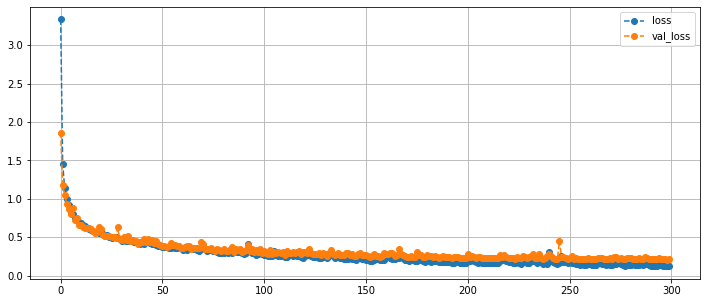

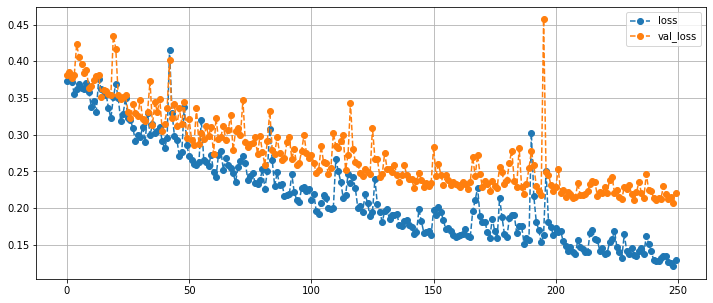

----------------------------------- Fold: 2 ------------------------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 40, 600)           782400    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40, 500)           1702000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 40, 300)           781200    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 40, 200)           320800    
_________________________________________________________________
dense_2 (Dense)              (None, 40, 50)            10050     
_________________________________________________________________
dense_3 (Dense)              (None, 40, 1)             51        
Total params: 3,596,501
Trainable param

None

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
118/118 [==============================] - 37s 157ms/step - loss: 5.8005 - val_loss: 1.6806
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009997559, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.5787 - val_loss: 1.2680
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009995119, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.1650 - val_loss: 1.0385
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009992679, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.0003 - val_loss: 0.9045
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009990239, shape=(), dtype=float32).
118/118 [================

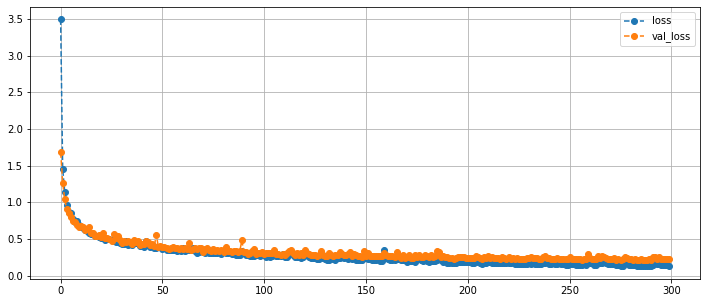

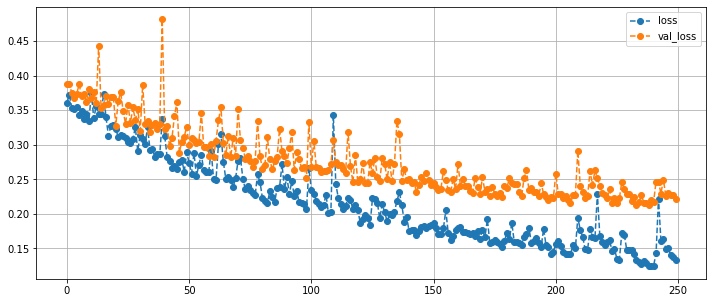

----------------------------------- Fold: 3 ------------------------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (None, 40, 600)           782400    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 40, 500)           1702000   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 40, 300)           781200    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 40, 200)           320800    
_________________________________________________________________
dense_4 (Dense)              (None, 40, 50)            10050     
_________________________________________________________________
dense_5 (Dense)              (None, 40, 1)             51        
Total params: 3,596,501
Trainable param

None

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
118/118 [==============================] - 37s 158ms/step - loss: 6.6555 - val_loss: 1.9584
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009997559, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.9014 - val_loss: 1.4844
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009995119, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.4855 - val_loss: 1.2517
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009992679, shape=(), dtype=float32).
118/118 [==============================] - 5s 42ms/step - loss: 1.2231 - val_loss: 1.0612
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009990239, shape=(), dtype=float32).
118/118 [================

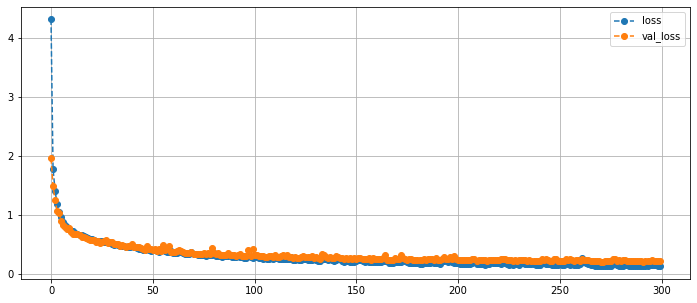

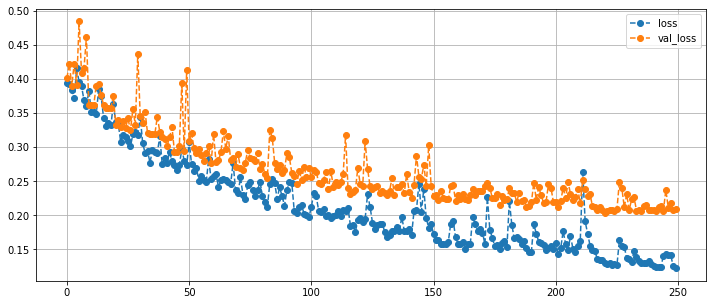

----------------------------------- Fold: 4 ------------------------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_12 (Bidirectio (None, 40, 600)           782400    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 40, 500)           1702000   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 40, 300)           781200    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 40, 200)           320800    
_________________________________________________________________
dense_6 (Dense)              (None, 40, 50)            10050     
_________________________________________________________________
dense_7 (Dense)              (None, 40, 1)             51        
Total params: 3,596,501
Trainable param

None

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
118/118 [==============================] - 38s 159ms/step - loss: 5.5313 - val_loss: 1.7488
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009997559, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.5773 - val_loss: 1.2915
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009995119, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.1668 - val_loss: 0.9914
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009992679, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.0118 - val_loss: 0.8831
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009990239, shape=(), dtype=float32).
118/118 [================

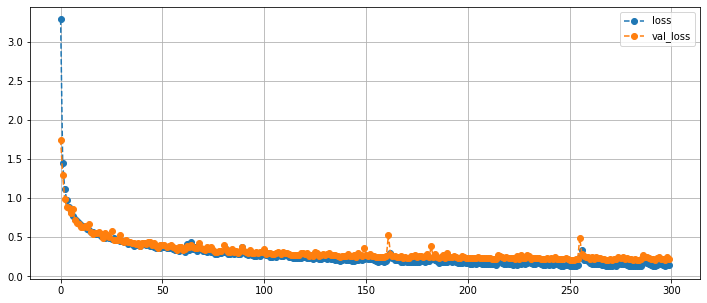

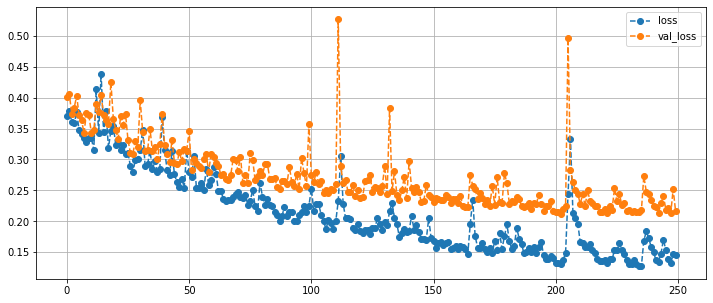

----------------------------------- Fold: 5 ------------------------------------
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_16 (Bidirectio (None, 40, 600)           782400    
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 40, 500)           1702000   
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 40, 300)           781200    
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 40, 200)           320800    
_________________________________________________________________
dense_8 (Dense)              (None, 40, 50)            10050     
_________________________________________________________________
dense_9 (Dense)              (None, 40, 1)             51        
Total params: 3,596,501
Trainable param

None

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
118/118 [==============================] - 38s 164ms/step - loss: 5.9169 - val_loss: 1.8670
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009997559, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.6450 - val_loss: 1.2326
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009995119, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.1753 - val_loss: 1.0858
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009992679, shape=(), dtype=float32).
118/118 [==============================] - 5s 41ms/step - loss: 1.0467 - val_loss: 0.9012
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009990239, shape=(), dtype=float32).
118/118 [================

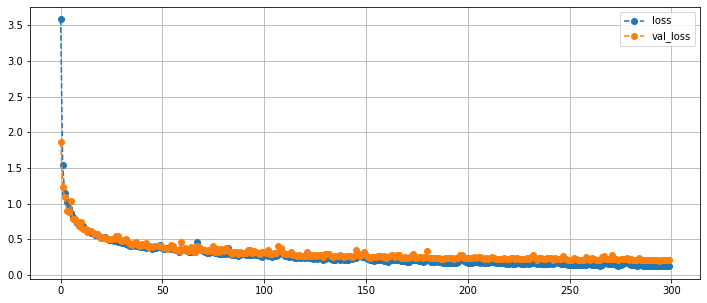

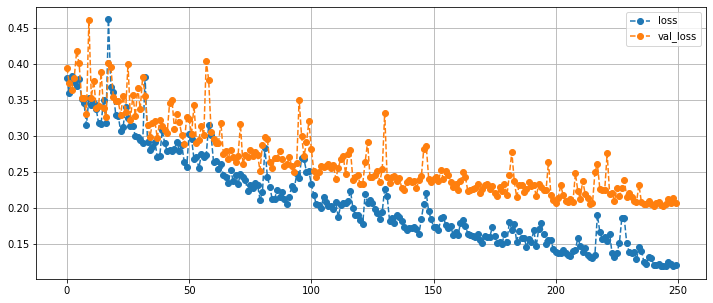

In [ ]:
EPOCH = 300
BATCH_SIZE = 512

kf = KFold(n_splits=5, shuffle=True, random_state=2021)
models_by_fold = list()

oof = train_raw[["id","breath_id","u_out","pressure"]].copy()

for fold, (train_idx,valid_idx) in enumerate(kf.split(train, targets)):

    print(f" Fold: {fold+1} ".center(80, "-"))
    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = targets[train_idx], targets[valid_idx]

    with tpu_strategy.scope():
        model = keras.models.Sequential([
            keras.layers.Input(shape=train.shape[-2:]),
            keras.layers.Bidirectional(keras.layers.LSTM(300, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(250, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(150, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True)),
            keras.layers.Dense(50, activation='selu'),
            keras.layers.Dense(1),
        ])
        model.compile(optimizer="adam", loss="mae")
    display(model.summary())

    scheduler = ExponentialDecay(1e-3, 400*((len(train)*0.8)/BATCH_SIZE), 1e-5)
    lr = LearningRateScheduler(scheduler, verbose=1)
    #es = EarlyStopping(monitor="val_loss", patience=15, verbose=1, mode="min", restore_best_weights=True)

    history = model.fit(
        X_train, 
        y_train, 
        validation_data=(X_valid, y_valid), 
        epochs=EPOCH, 
        batch_size=BATCH_SIZE, 
        callbacks=[lr],
        verbose=1,
    )
    models_by_fold.append(model)

    # generate the oof predictions
    x_valid_tf = tf.convert_to_tensor(X_valid, dtype=tf.float32)
    oof_preds = model.call(x_valid_tf, training=False).numpy().squeeze()
    idx = oof.query("breath_id in @valid_idx").index
    oof.loc[idx, "pred"] = oof_preds.ravel()

    plt.figure(figsize=(12,5))
    plt.plot(history.history["loss"], "o--", label="loss")
    plt.plot(history.history["val_loss"], "o--", label="val_loss")
    plt.grid()
    plt.legend(loc="best")
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.plot(history.history["loss"][50:], "o--", label="loss")
    plt.plot(history.history["val_loss"][50:], "o--", label="val_loss")
    plt.grid()
    plt.legend(loc="best")
    plt.show()


In [14]:
print("mae:", oof.eval("abs(pressure - pred)").mean())
print("mae inspiratory:", oof.query("u_out == 0").eval("abs(pressure - pred)").mean())
print("mae expiratory :", oof.query("u_out == 1").eval("abs(pressure - pred)").mean())

mae: 0.20938487189579605
mae inspiratory: 0.2124941942660988
mae expiratory : 0.19958701148249222


- mae: 0.18086928169783648
- mae inpiratory: 0.2031012730817264
- mae expiratory: 0.16726918940573152

***
## sub generation

In [15]:
all_preds = list()
test_tf = tf.convert_to_tensor(test, dtype=tf.float32)

for model in models_by_fold:
    preds = model.call(test_tf, training=False).numpy().squeeze().ravel()
    all_preds.append(preds)

test_raw["pressure"] = np.mean(all_preds, axis=0)

In [16]:
sub = pd.merge(submission["id"], test_raw[["id","pressure"]], how="left", on="id")
sub["pressure"] = sub["pressure"].fillna(0)
sub.to_csv(f"{subs_path}/sub_lstm.csv", index=False)

In [17]:
oof.to_csv(f"{results_path}/oof_lstm.csv", index=False)

***